#### Task 5(c): Take a binary image & perform Boundary Extraction using morphological operation

### Importing the Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Erosion

In [2]:
def erosion(image, structuring_element):
    eroded_image = image.copy()
    structuring_element = structuring_element * 255
    offset = structuring_element.shape[0] // 2
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            fit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        sr, sc = x + offset, y + offset
                        if (structuring_element[x, y] and image[r + x, c + y] != structuring_element[sr, sc]):
                            fit = False
            eroded_image[r, c] = 255 if fit else 0

    return np.uint8(eroded_image)

### Function for Boundary Extraction

In [3]:
def extract_boundary(image, structuring_element):
    eroded_image = erosion(image.copy(), structuring_element)
    return image - eroded_image

### Creating Structuring Element for Erosion & Dilation

In [4]:
structuring_element_size = 3
structuring_element = np.ones((structuring_element_size, structuring_element_size))

### Loading the Original Image

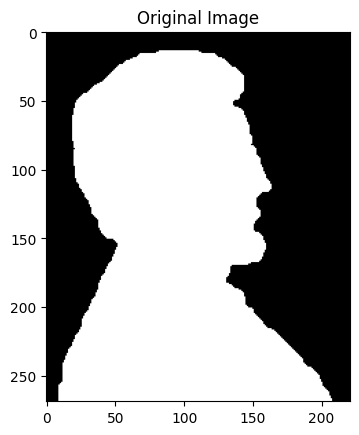

In [5]:
original_image = cv2.imread("./Lincoln 221x269.tif", 0)
plt.imshow(original_image, cmap = "gray")
plt.title("Original Image")
plt.show()

### Applying Boundary Extraction

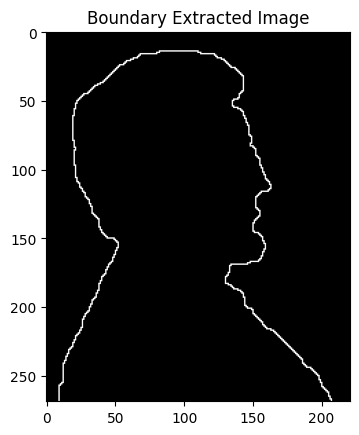

In [6]:
image_after_boundary_extraction = extract_boundary(original_image, structuring_element)
plt.imshow(image_after_boundary_extraction, cmap = "gray")
plt.title("Boundary Extracted Image")
plt.show()